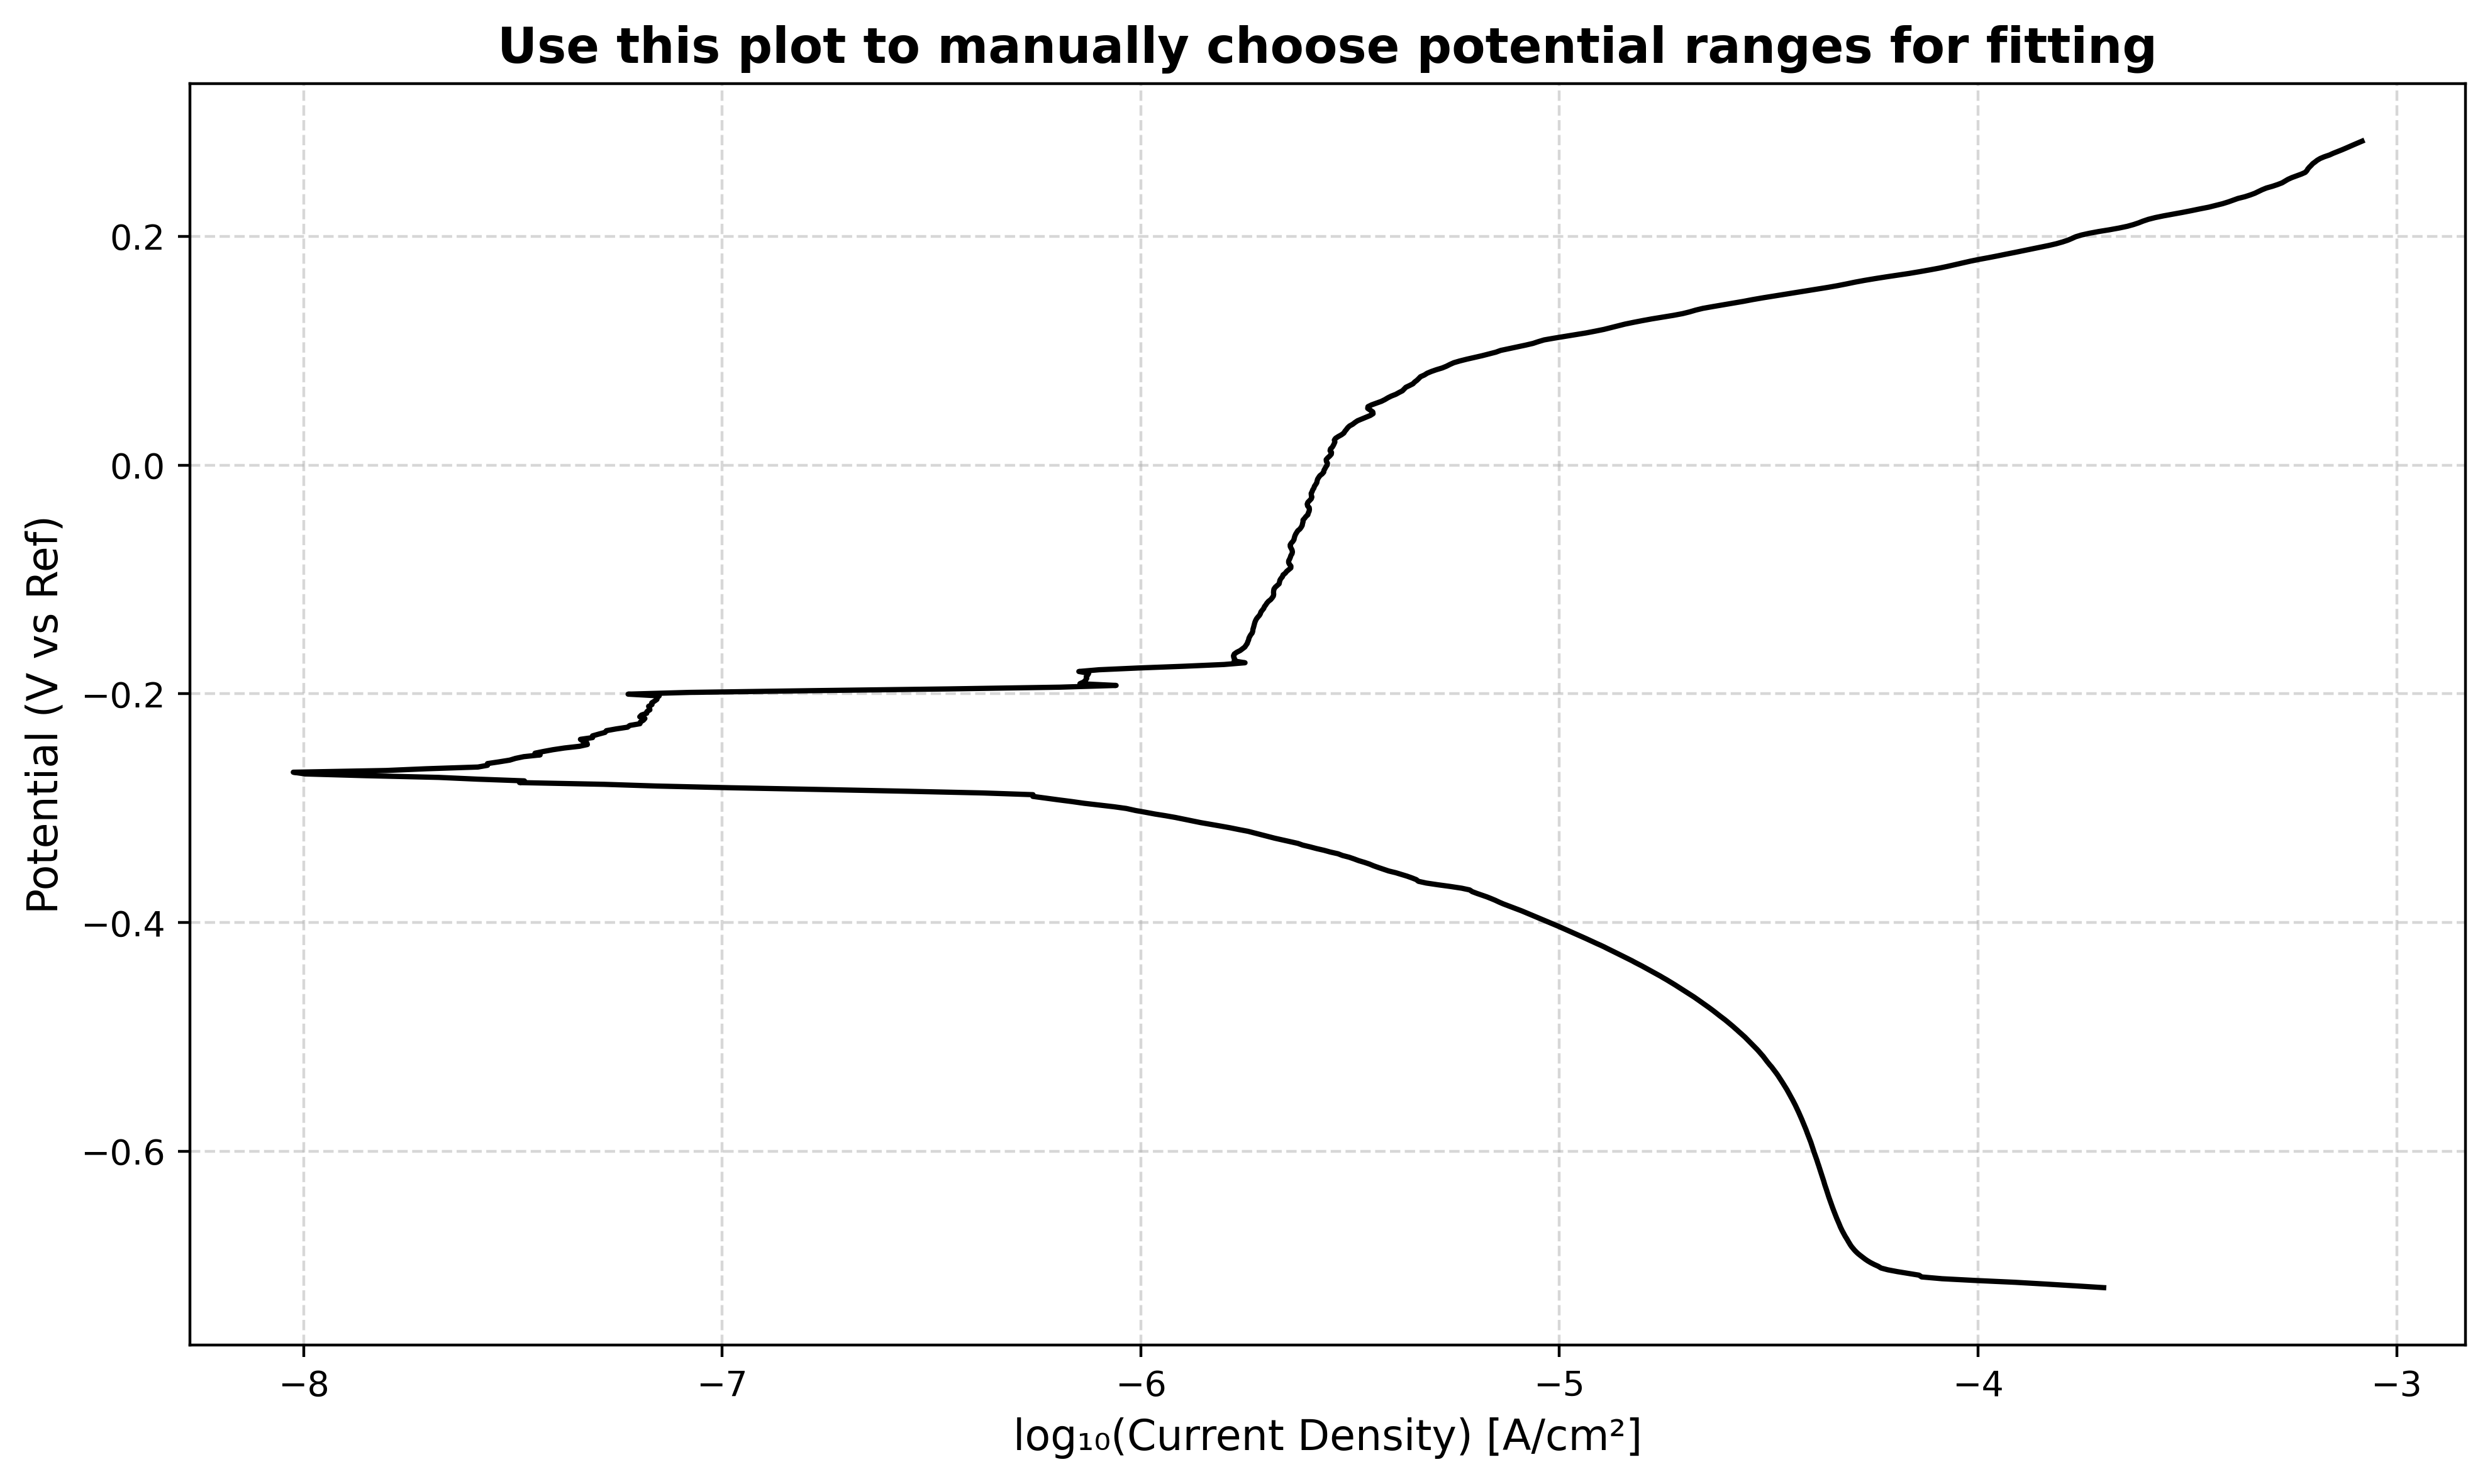

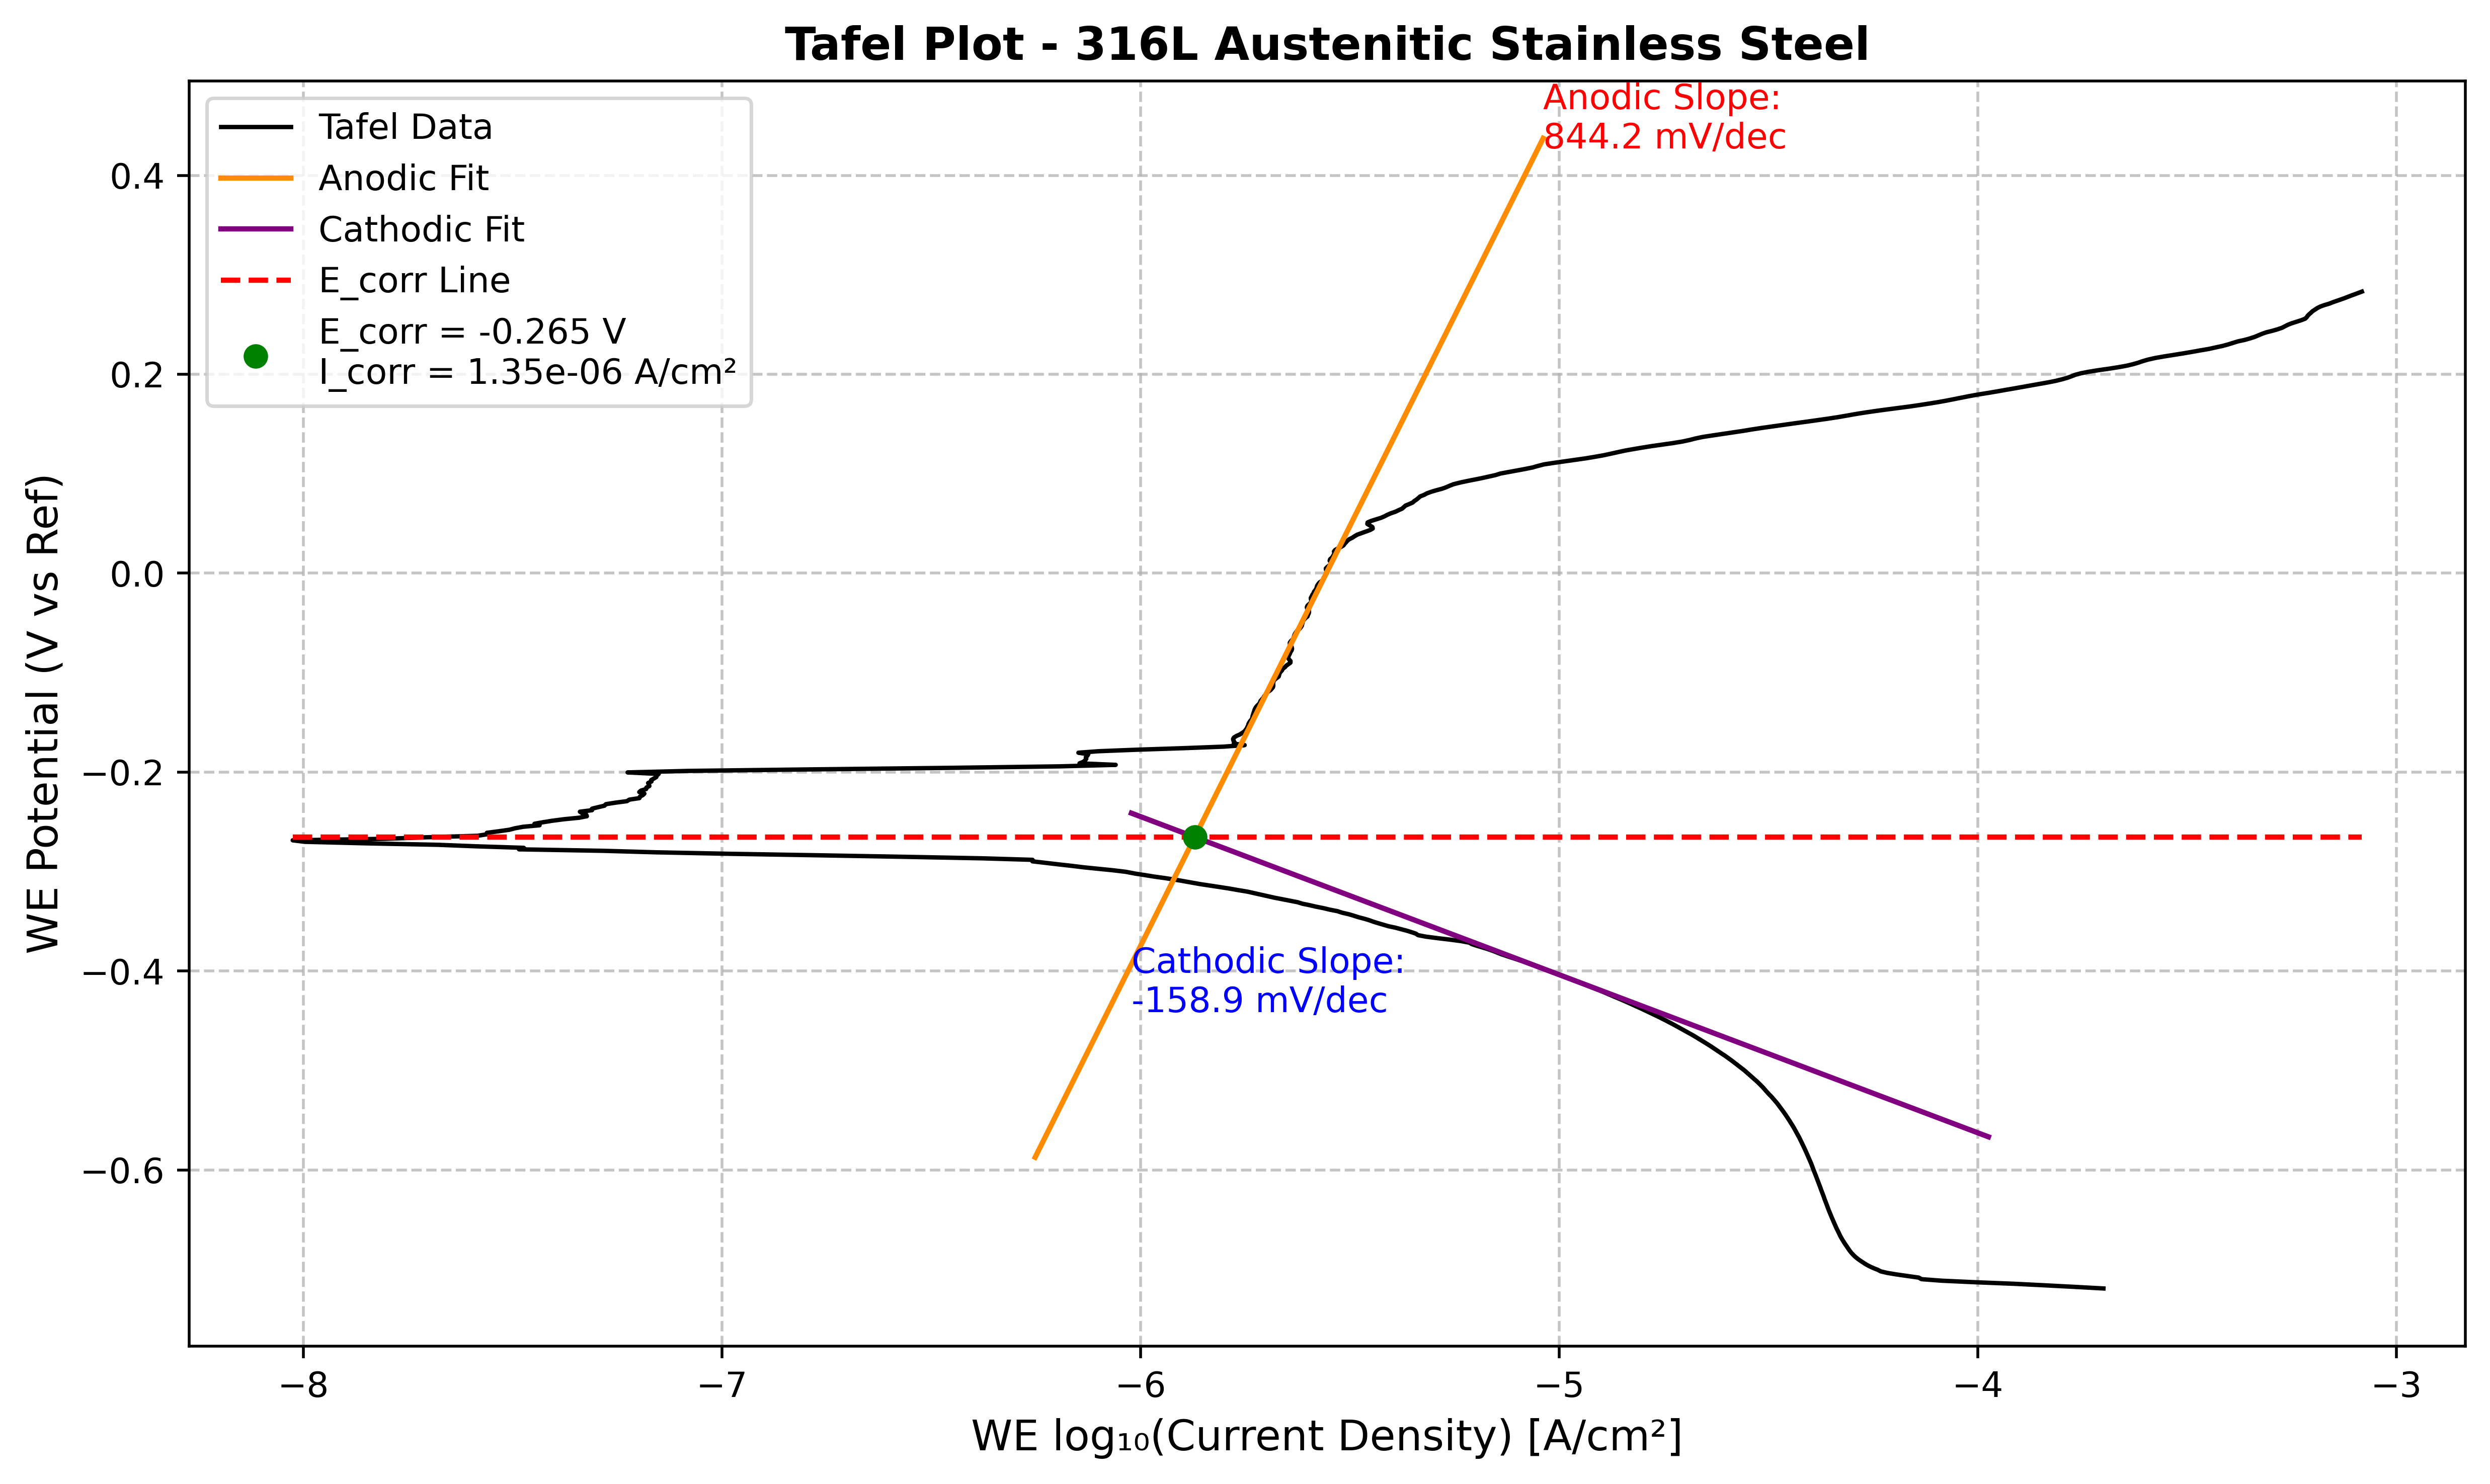


=== Tafel Slopes & Corrosion Parameters ===
Anodic Tafel Slope   : 844.17 mV/dec
Cathodic Tafel Slope : -158.95 mV/dec
E_corr               : -0.265 V
I_corr               : 1.35e-06 A/cm²


In [ ]:
#for a non-noisy data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# === Load and prepare data ===
df = pd.read_csv("0%.csv", encoding="ISO-8859-1")#enter your file name here
potential_col = 'Potential'
current_col = 'log j'

df = df[df[current_col] != 0].copy()
df['log_current_density'] = df[current_col] 

plt.figure(figsize=(10, 6), dpi=400)  # High-resolution plot
plt.plot(df['log_current_density'], df[potential_col], 'k-', label='Tafel Data')
plt.xlabel("log₁₀(Current Density) [A/cm²]", fontsize=12)
plt.ylabel("Potential (V vs Ref)", fontsize=12)
plt.title("Use this plot to manually choose potential ranges for fitting", fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Define Potential Ranges Here
# Modify these based on the initial plot
p_anodic_min = -0.16
p_anodic_max = 0.02
p_cathodic_min = -0.409
p_cathodic_max = -0.40
#  Mask data 
anodic_mask = (df[potential_col] >= p_anodic_min) & (df[potential_col] <= p_anodic_max)
cathodic_mask = (df[potential_col] >= p_cathodic_min) & (df[potential_col] <= p_cathodic_max)

x_anodic = df.loc[anodic_mask, 'log_current_density']
y_anodic = df.loc[anodic_mask, potential_col]
slope_a, intercept_a, *_ = linregress(x_anodic, y_anodic)

x_cathodic = df.loc[cathodic_mask, 'log_current_density']
y_cathodic = df.loc[cathodic_mask, potential_col]
slope_c, intercept_c, *_ = linregress(x_cathodic, y_cathodic)

#  Intersection Point 
logI_intersect = (intercept_c - intercept_a) / (slope_a - slope_c)
E_corr = slope_a * logI_intersect + intercept_a
I_corr = 10 ** logI_intersect

#  Tafel slopes
tafel_slope_anodic = slope_a * 1000  # mV/dec
tafel_slope_cathodic = slope_c * 1000  # mV/dec

#  Final Tafel Plot
plt.figure(figsize=(10, 6), dpi=500)
plt.plot(df['log_current_density'], df[potential_col], 'k-', lw=1.25, label='Tafel Data')

# Tangent lines
x_fit_anodic = np.linspace(x_anodic.min() - 0.5, x_anodic.max() + 0.5, 300)
y_fit_anodic = slope_a * x_fit_anodic + intercept_a
plt.plot(x_fit_anodic, y_fit_anodic, color='darkorange', lw=1.5, label='Anodic Fit')

x_fit_cathodic = np.linspace(x_cathodic.min() - 1.0, x_cathodic.max() + 1.0, 300)
y_fit_cathodic = slope_c * x_fit_cathodic + intercept_c
plt.plot(x_fit_cathodic, y_fit_cathodic, color='purple', lw=1.5, label='Cathodic Fit')

# E_corr line and intersection
x_range = np.linspace(df['log_current_density'].min(), df['log_current_density'].max(), 300)
plt.hlines(E_corr, x_range.min(), x_range.max(), colors='red', linestyles='--', linewidth=1.5, label='E_corr Line')
plt.plot(logI_intersect, E_corr, 'go', markersize=6, label=f'E_corr = {E_corr:.3f} V\nI_corr = {I_corr:.2e} A/cm²')

# Annotations
plt.text(x_fit_anodic.max(), slope_a * x_fit_anodic.max() + intercept_a - 0.01,
         f"Anodic Slope:\n{tafel_slope_anodic:.1f} mV/dec", color='red', fontsize=10)

plt.text(x_fit_cathodic.min(), slope_c * x_fit_cathodic.min() + intercept_c - 0.2,
         f"Cathodic Slope:\n{tafel_slope_cathodic:.1f} mV/dec", color='blue', fontsize=10)

# Labels and layout
plt.xlabel("WE log₁₀(Current Density) [A/cm²]", fontsize=12)
plt.ylabel("WE Potential (V vs Ref)", fontsize=12)
plt.title("Tafel Plot - 316L Austenitic Stainless Steel", fontsize=13, weight='bold')
plt.grid(True, linestyle='--', alpha=0.75)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("\n=== Tafel Slopes & Corrosion Parameters ===")
print(f"Anodic Tafel Slope   : {tafel_slope_anodic:.2f} mV/dec")
print(f"Cathodic Tafel Slope : {tafel_slope_cathodic:.2f} mV/dec")
print(f"E_corr               : {E_corr:.3f} V")
print(f"I_corr               : {I_corr:.2e} A/cm²")
